In [1]:
# 1
%matplotlib inline
import numpy as np
import pandas as pd
import os,sys
import utilities as utils
import matplotlib.pyplot as plt
import matplotlib

# Draw SE Demostration

In [3]:
# 2
df_sub = pd.read_hdf('df_sub_new.h5','df_sub')

In [20]:
# 
total_id_uniq = np.unique(df_sub['Station ID'].values)

In [22]:
len(total_id_uniq)

51

In [21]:
id_record_dict_new = {}
for id in total_id_uniq:
    id_record_dict_new[id] = len(df_sub[df_sub['Station ID'] == id])

In [13]:
id_record_dict_new

{7: 131753,
 8: 1479912,
 11: 474258,
 14: 1815005,
 17: 981459,
 19: 833511,
 23: 1448003,
 26: 1532279,
 27: 122838,
 31: 475734,
 33: 970739,
 34: 1348708,
 35: 2084940,
 40: 912150,
 46: 1502052,
 47: 132309,
 49: 818238,
 51: 463746,
 55: 466390,
 57: 409707,
 59: 275774,
 60: 462547,
 61: 267775,
 62: 325345,
 63: 287042,
 65: 364818,
 69: 494813,
 70: 855870,
 71: 255942,
 72: 911061,
 73: 904400,
 75: 933189,
 76: 427241,
 79: 787950,
 80: 435960,
 81: 388750,
 82: 194407,
 84: 447777,
 87: 462860,
 88: 384518,
 89: 904034,
 93: 471416,
 96: 474777,
 97: 897278,
 98: 347117,
 100: 481362,
 103: 453399,
 104: 455293,
 109: 240373,
 111: 374388,
 121: 4545708}

In [44]:
id_record_dict_new_sorted = sorted(id_record_dict_new.items(),key=lambda kv:(kv[1],kv[0]),reverse=True)
# print(id_record_dict_new_sorted[:19])
print(id_record_dict_new_sorted)

[(121, 4545708), (35, 2084940), (14, 1815005), (26, 1532279), (46, 1502052), (8, 1479912), (23, 1448003), (34, 1348708), (17, 981459), (33, 970739), (75, 933189), (40, 912150), (72, 911061), (73, 904400), (89, 904034), (97, 897278), (70, 855870), (19, 833511), (49, 818238), (79, 787950), (69, 494813), (100, 481362), (31, 475734), (96, 474777), (11, 474258), (93, 471416), (55, 466390), (51, 463746), (87, 462860), (60, 462547), (104, 455293), (103, 453399), (84, 447777), (80, 435960), (76, 427241), (57, 409707), (81, 388750), (88, 384518), (111, 374388), (65, 364818), (98, 347117), (62, 325345), (63, 287042), (59, 275774), (61, 267775), (71, 255942), (109, 240373), (82, 194407), (47, 132309), (7, 131753), (27, 122838)]


In [42]:
# 12
# 5
indices = np.linspace(0,np.max(total_id_uniq),np.max(total_id_uniq)+1,dtype=int)
# print(indices)
indices1 = np.zeros(np.max(total_id_uniq)+1)
indices2 = np.zeros(np.max(total_id_uniq)+1)
for item in total_id_uniq:
    indices2[item] = id_record_dict_new[item]

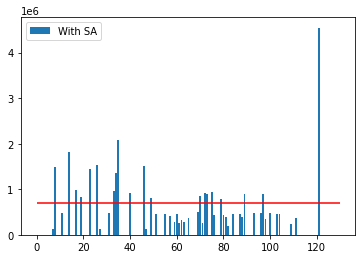

In [43]:
plt.bar(indices,indices2,label='With SA')
plt.hlines(700000,0,130,colors='red')
plt.legend()

## Previous Code

In [2]:
# 2
df_sum = pd.read_hdf('data_ori.h5','df')

In [3]:
# 3
total_id = df_sum['Station ID'].values
total_id_uniq = np.unique(total_id)
print(total_id_uniq,len(total_id_uniq))

[  3   5   7   8   9  10  11  12  13  14  15  17  18  19  21  23  24  25
  26  27  30  31  32  33  34  35  36  37  39  40  41  42  43  44  45  46
  47  49  50  51  53  54  55  56  57  59  60  61  62  63  64  65  66  68
  69  70  71  72  73  75  76  79  80  81  82  84  85  87  88  89  92  93
  94  95  96  97  98  99 100 103 104 105 106 107 109 111 121 122] 88


In [4]:
# 4
id_record_dict = {}
for id in total_id_uniq:
    id_record_dict[id] = len(df_sum[df_sum['Station ID'] == id])
    # print(id,len(df_sum[df_sum['Station ID'] == id]))

In [6]:
# 6
lat = (46.51788,46.52227)
log = (6.56517,6.5693)

loc_file = '/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/EPFL_sensor_loc_simple2.xlsx'
df = pd.read_excel(loc_file)

lat_range = np.linspace(lat[0],lat[1],11)
log_range = np.linspace(log[0],log[1],11)
# print(lat_range)
# print(log_range)

In [7]:
# 7
def draw_lune_heatmap(df,res,lat=lat,log=log):
    # res refers to resolution
    lat_range = np.linspace(lat[1],lat[0],res+1)
    log_range = np.linspace(log[0],log[1],res+1)
    pic = np.zeros((res,res))
    pic2 = np.zeros((res,res))
    pairs = []
    for i in range(res):
        # print(i,lat_range[i],lat_range[i+1])
        for j in range(res):
            sub_df = df[(df['Latitude'] < lat_range[i]) & (df['Latitude'] > lat_range[i+1]) & (df['Longitude'] > log_range[j]) & (df['Longitude'] < log_range[j+1])]
            pic[i][j] = len(sub_df)
            if len(sub_df) > 0:
                pic2[i][j]=1
            # pic[i][j] = i*res+j
            if len(sub_df) > 1:
                pairs.append([i*res+j,sub_df['ID'].values])
                #pairs ( offset, [pair])
            max_value = 0
            max_id = 0
            for value in sub_df['ID'].values:
                # print(value)
                if len(sub_df[sub_df['ID'] == value]) > max_value:
                    max_id =value
            pic[i][j] = max_id
    return pic,pairs,pic2
# 输出的pic有颜色明暗，pic2为黑白两色

[[14, array([ 3, 23, 42])], [15, array([ 5, 17])], [24, array([21, 26, 41])], [25, array([14, 30, 39, 56])], [26, array([  9,  15,  18,  24,  37,  44, 105, 121])], [27, array([12, 45, 46])], [28, array([ 8, 25, 36])], [33, array([64, 75, 99])], [36, array([13, 40])], [37, array([ 34,  43, 106])], [53, array([ 70, 122])], [54, array([49, 68])], [63, array([66, 72])], [64, array([54, 73])], [66, array([ 32,  35,  50,  94, 107])], [69, array([79, 95])], [75, array([92, 97])], [77, array([33, 53])], [78, array([10, 19])], [91, array([85, 89])]]


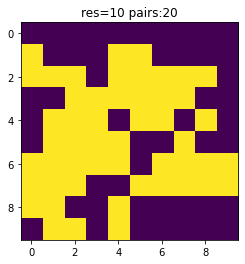

In [8]:
# 8
res = 10
pic,pairs,pic2 = draw_lune_heatmap(df,res,lat,log)
plt.title('res='+str(res)+' pairs:'+str(len(pairs)))
plt.grid(b=False)
plt.imshow(pic2)
print(pairs)
# print(pic)

In [ ]:
df_sum

In [9]:
# 9 pick up the sensor with the largest records in a group
pair_max = []
# (max_id, pair_items)
for pair in pairs:
    tmp_dict ={}
    for item in pair[1]:
        # print(item)
        tmp_len = len(df_sum[df_sum['Station ID'] == item])
        tmp_dict[item] = tmp_len
        print(item,tmp_len)
    # print(np.max(tmp_array))
    # print(tmp_array == np.max(tmp_array))
    # print(tmp_dict.keys())
    # print(tmp_dict.items())
    tmp = sorted(tmp_dict.items(),key=lambda kv:(kv[1],kv[0]),reverse=True)[0][0]
    pair_max.append((tmp,pair[1]))
    print('max id: ',tmp)
    # print(np.max(tmp_dict.values.items())
    # print(sorted(key_value.items(), key = lambda kv:(kv[1], kv[0])))    
    print('----')
pair_max = np.array(pair_max)
print(pair_max.T[0])
print(len(pair_max))

3 463366
23 508496
42 476141
max id:  23
----
5 473401
17 508058
max id:  17
----
21 516111
26 523660
41 492508
max id:  26
----
14 507791
30 459515
39 498798
56 348901
max id:  14
----
9 419401
15 507981
18 510324
24 515165
37 481248
44 502059
105 340836
121 1268694
max id:  121
----
12 495806
45 496420
46 509826
max id:  46
----
8 508506
25 486527
36 484879
max id:  8
----
64 307468
75 371510
99 254211
max id:  75
----
13 446626
40 465524
max id:  40
----
34 515546
43 474557
106 358605
max id:  34
----
70 477651
122 378219
max id:  70
----
49 449340
68 368898
max id:  49
----
66 448698
72 462363
max id:  72
----
54 447130
73 457270
max id:  73
----
32 486101
35 520571
50 452121
94 258488
107 367659
max id:  35
----
79 421204
95 366746
max id:  79
----
92 441339
97 455939
max id:  97
----
33 489204
53 481535
max id:  33
----
10 365048
19 468463
max id:  19
----
85 446444
89 457590
max id:  89
----
[23 17 26 14 121 46 8 75 40 34 70 49 72 73 35 79 97 33 19 89]
20
ipykernel_launcher:21: 

In [ ]:
pair_max

In [10]:
# 10 SA
for item in pair_max:
    for id in item[1]:
        df_sum.loc[df_sum['Station ID'] == id,'Station ID'] = item[0]
        print('ori',id,'max:',item[0])
    print("-------")

ori 3 max: 23
ori 23 max: 23
ori 42 max: 23
-------
ori 5 max: 17
ori 17 max: 17
-------
ori 21 max: 26
ori 26 max: 26
ori 41 max: 26
-------
ori 14 max: 14
ori 30 max: 14
ori 39 max: 14
ori 56 max: 14
-------
ori 9 max: 121
ori 15 max: 121
ori 18 max: 121
ori 24 max: 121
ori 37 max: 121
ori 44 max: 121
ori 105 max: 121
ori 121 max: 121
-------
ori 12 max: 46
ori 45 max: 46
ori 46 max: 46
-------
ori 8 max: 8
ori 25 max: 8
ori 36 max: 8
-------
ori 64 max: 75
ori 75 max: 75
ori 99 max: 75
-------
ori 13 max: 40
ori 40 max: 40
-------
ori 34 max: 34
ori 43 max: 34
ori 106 max: 34
-------
ori 70 max: 70
ori 122 max: 70
-------
ori 49 max: 49
ori 68 max: 49
-------
ori 66 max: 72
ori 72 max: 72
-------
ori 54 max: 73
ori 73 max: 73
-------
ori 32 max: 35
ori 35 max: 35
ori 50 max: 35
ori 94 max: 35
ori 107 max: 35
-------
ori 79 max: 79
ori 95 max: 79
-------
ori 92 max: 97
ori 97 max: 97
-------
ori 33 max: 33
ori 53 max: 33
-------
ori 10 max: 19
ori 19 max: 19
-------
ori 85 max: 89
or

In [ ]:
np.unique(df_sum['Station ID'].values)

In [11]:
# 11 Count the different records after SA
total_id_uniq_new = np.unique(df_sum['Station ID'].values)
id_record_dict_new = {}
for item in total_id_uniq:
    id_record_dict_new[item]  = 0

for item in total_id_uniq_new:
    id_record_dict_new[item] = len(df_sum[df_sum['Station ID'] == item])

In [ ]:
print('id','\tbefore','\t\tafter')
for id in total_id_uniq:
    print(id,'\t',id_record_dict[id],'\t',id_record_dict_new[id])

In [12]:
# 12
for item in total_id_uniq:
    indices1[item] = id_record_dict[item]
for item in total_id_uniq_new:
    indices2[item] = id_record_dict_new[item]

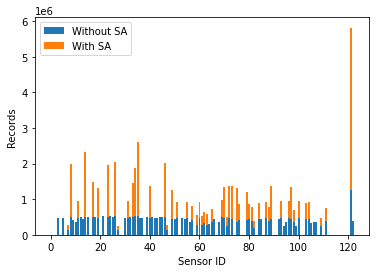

In [13]:
# 13 Vital Figure
plt.bar(indices,indices1,label='Without SA')
plt.bar(indices,indices2,bottom=indices1,label='With SA')
plt.xlabel('Sensor ID')
plt.ylabel('Records')
plt.legend()
# plt.savefig('Figure/SA.png',bbox_inches='tight',dpi=300)

In [ ]:
# 14 Vital Figure
df_sum.to_hdf('df_sum_new.h5','df_sum')

In [ ]:
df_sum = pd.read_hdf('df_sum_new.h5','df_sum')

In [ ]:
len(np.unique(df_sum['Station ID'].values))

In [ ]:
df_sub = df_sum.drop(['Solar Radiation','Soil Moisture [%]','Watermark [kPa]','Rain Meter [mm]','Wind Speed [m/s]','Wind Direction [°]'],axis=1)

In [ ]:
df_sub

In [14]:
# 15
df_sub = df_sum.drop(['Solar Radiation','Soil Moisture [%]','Watermark [kPa]','Rain Meter [mm]','Wind Speed [m/s]','Wind Direction [°]'],axis=1)
# df_sub.to_hdf('df_sub_new.h5','df_sub')

## The distribution map of sensor id as a group

In [15]:
# 16
def draw_lune_distribution(df,res,lat=lat,log=log,id_list=total_id_uniq_new):
    # res refers to resolution
    lat_range = np.linspace(lat[1],lat[0],res+1)
    log_range = np.linspace(log[0],log[1],res+1)
    pic = np.zeros((res,res))
    pic2 = np.zeros((res,res))
    pairs = []
    id_sum = 0
    for i in range(res):
        # print(i,lat_range[i],lat_range[i+1])
        for j in range(res):
            sub_df = df[(df['Latitude'] < lat_range[i]) & (df['Latitude'] > lat_range[i+1]) & (df['Longitude'] > log_range[j]) & (df['Longitude'] < log_range[j+1])]
            sub_df_id_uniq = np.unique(sub_df['ID'].values)
            for id in sub_df_id_uniq:  
                if id in id_list:
                    pic2[i][j] = 1
                    pic[i][j] = id
                    id_sum +=1
            # print(sub_df_id_uniq)

    return pic,pic2,id_sum
# 输出的pic有颜色明暗，pic2为黑白两色
draw_lune_distribution(df,res,lat,log)

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 63.,   0.,   0.,   0.,  23.,  17.,   0.,   0.,   0.,   0.],
        [ 47.,   7.,  27.,   0.,  26.,  14., 121.,  46.,   8.,   0.],
        [  0.,   0., 111.,  75.,  57.,  59.,  40.,  34.,   0.,   0.],
        [  0.,  61.,  71.,  65.,   0.,  82.,  62.,   0.,  76.,   0.],
        [  0.,  51.,  11.,  70.,  49.,   0.,   0.,  60.,   0.,   0.],
        [ 84.,  81.,  55.,  72.,  73.,   0.,  35.,  31.,  69.,  79.],
        [103.,  80.,  96.,   0.,   0.,  97., 100.,  33.,  19.,  93.],
        [109.,  87.,   0.,   0., 104.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  89.,  88.,   0.,  98.,   0.,   0.,   0.,   0.,   0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
        [0., 0., 1., 1., 1., 1., 1., 1., 0., 0.],
        [0., 1., 1., 1., 0., 1., 1., 0., 1., 0.],
        [0., 1., 1., 1., 1., 0., 0., 1., 0., 0.]

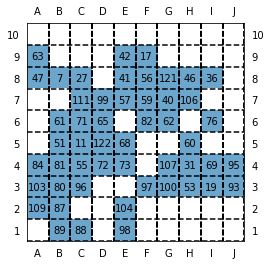

In [18]:
# 17 !!!
plt.figure()
#Color 1
# color1=(1,1,1)
# color2=(187/255,238/255,238/255)
#Color 2
color1 = (1,1,1)
# color1=(65/255,105/255,225/255)
color2=(108/255,166/255,205/255)
color3 = 'black'
line_style = 'dashed' # solid, dashed, dotted, dashdot
for i in range(res):
    for j in range(res):
        if(int(pic[j][i]) != 0):
            if int(pic[j][i] / 100) != 0:
                plt.text(i-0.45,j+0.15,int(pic[j][i]))
                pass
            elif int(pic[j][i] / 10) != 0:
                plt.text(i-0.3,j+0.15,int(pic[j][i]))
                pass
            else:
                plt.text(i-0.15,j+0.15,int(pic[j][i]))
                pass

            plt.vlines(0.5+i, -0.5, 10, colors = color3, linestyles = line_style)
    plt.hlines(0.5+i, -0.5, 10, colors = color3, linestyles = line_style)
my_cmap=matplotlib.colors.LinearSegmentedColormap.from_list('my_camp',[color1,color2],2)
plt.xticks(np.linspace(0,10,10,endpoint=False),('A','B','C','D','E','F','G','H','I','J'),fontsize=10)
plt.yticks(np.linspace(0,10,10,endpoint=False),('10','9','8','7','6','5','4','3','2','1'),fontsize=10)
plt.imshow(pic2,cmap=my_cmap)
plt.tick_params(bottom=False,left=False,labeltop=True,labelright=True)
# plt.title('XXX')
# plt.savefig('Figure/Sensor_Dist2.png',bbox_inches='tight',dpi=300)



In [ ]:
total_id_uniq_new

In [ ]:
df

In [ ]:
for id in total_id_uniq_new:
    print(id)
    print('lat',df[df['ID']==id]['Latitude'].values[0])
    print('long',df[df['ID']==id]['Longitude'].values[0])
    print('-------------')